In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os


def plot_metric_with_runs(
    dfs_default,
    dfs_harmonic,
    metric,
    metric_label,
    title,
    save_path=None,
):
    """
    Plot a metric with multiple runs shown as separate lines.
    Parameters:
    - dfs_default: list of dataframes for default approach
    - dfs_harmonic: list of dataframes for harmonic approach
    - metric: column name to plot
    - metric_label: label for the metric axis
    - title: plot title
    - save_path: optional path to save the figure
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    markers = ["o", "s", "^"]  # Different markers for each run

    # Plot default runs
    for i, df in enumerate(dfs_default):
        ax1.plot(df.index, df[metric], marker=markers[i], alpha=0.7, label=f"Run {i+1}")
    ax1.set_xlabel("$|CB|$", fontsize=14)
    ax1.set_ylabel(metric_label, fontsize=14)
    ax1.set_title(f"{title} - Default", fontsize=14)
    ax1.set_ylim(bottom=0)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot harmonic runs
    for i, df in enumerate(dfs_harmonic):
        ax2.plot(df.index, df[metric], marker=markers[i], alpha=0.7, label=f"Run {i+1}")
    ax2.set_xlabel("$|CB|$", fontsize=14)
    ax2.set_ylabel(metric_label, fontsize=14)
    ax2.set_title(f"{title} - Harmonic (ß=1)", fontsize=14)
    ax2.set_ylim(bottom=0)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()

    # Save if path provided
    if save_path:
        fig.savefig(save_path, bbox_inches="tight", dpi=150)
        print(f"Saved: {save_path}")

    plt.show()
    plt.close()


def get_graphs(dataset, save_dir=None):
    """
    Generate all metric plots for a dataset.

    Parameters:
    - dataset: name of the dataset
    - save_dir: optional directory to save figures (e.g., 'results/figures')
    """
    # Create save directory if specified
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)

    # Load all 3 runs for default and harmonic
    dfs_default = []
    dfs_harmonic = []

    for i in range(3):
        df_default = pd.read_csv(
            f"results/Q_{dataset}_default_{i}.csv", sep=";", index_col="|Q|"
        )
        df_harmonic = pd.read_csv(
            f"results/Q_{dataset}_harmonic_1_{i}.csv", sep=";", index_col="|Q|"
        )
        dfs_default.append(df_default)
        dfs_harmonic.append(df_harmonic)

    # Define metrics to plot
    metrics = [
        ("mu", "$\mu$", "Mean Number of Best Precedents"),
        ("mu_n", "$\mu_n$", "Mean Best Precedents (Non-Trivial)"),
        ("Ninc", "$N_{inc}$", "Inconsistent Forcings"),
        ("Ndel", "$N_{del}$", "Deletions Required"),
        ("Ntws", "$N_{tws}$", "Trivial Winning Strategies"),
        ("Nn", "$N_n$", "Non-Trivial Winning Strategies"),
    ]

    # Plot each metric
    for metric, metric_label, title in metrics:
        save_path = None
        if save_dir:
            # Create filename from metric name
            filename = f"{dataset}_{metric}.png"
            save_path = os.path.join(save_dir, filename)

        plot_metric_with_runs(
            dfs_default,
            dfs_harmonic,
            metric,
            metric_label,
            title,
            save_path=save_path,
        )

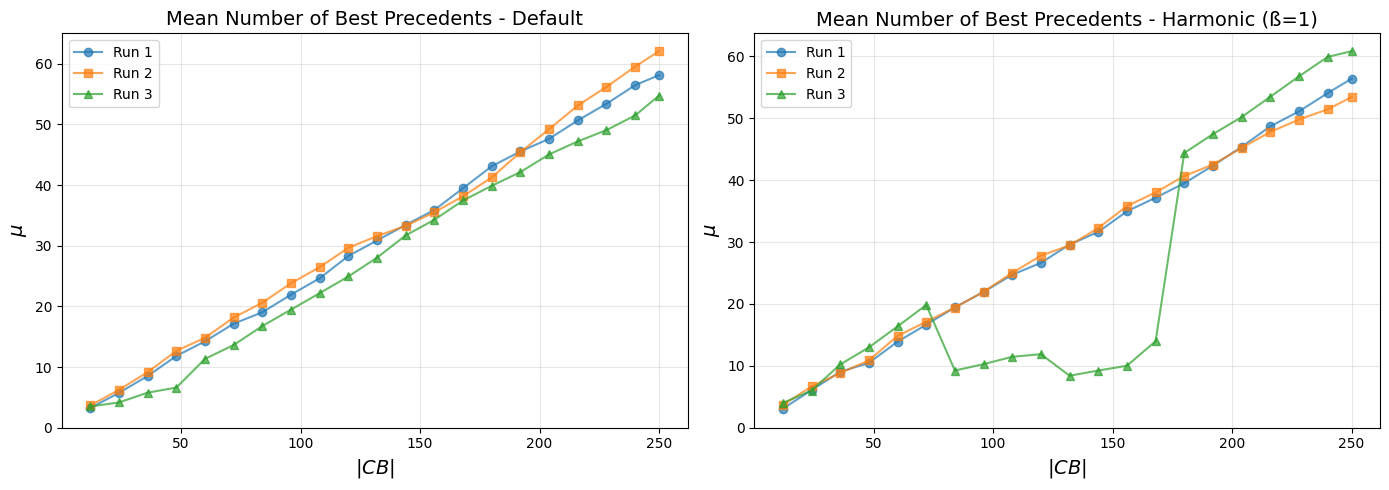

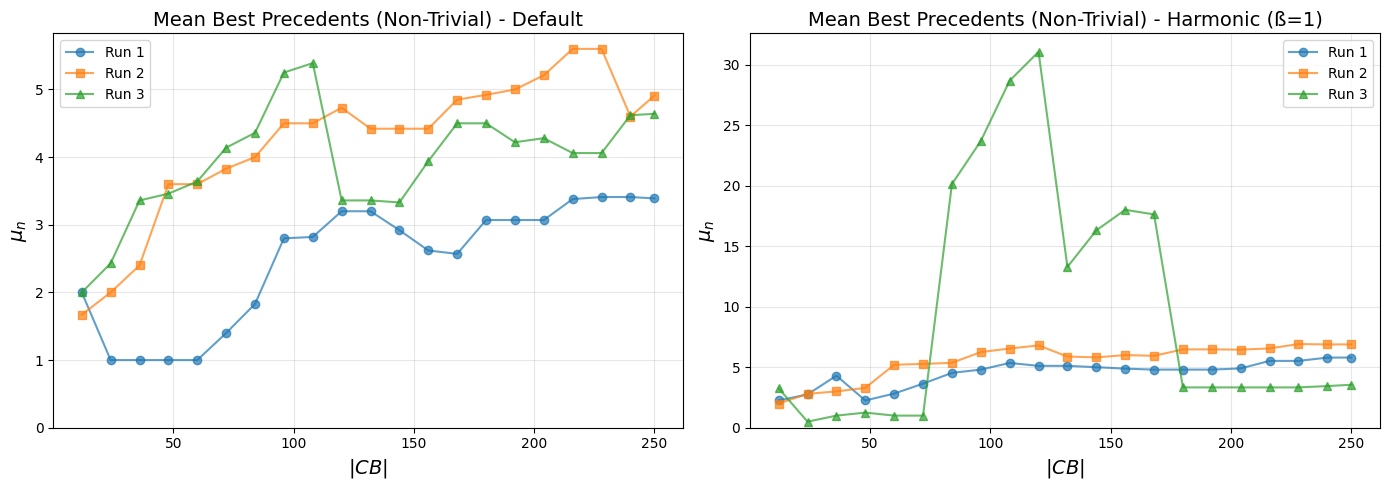

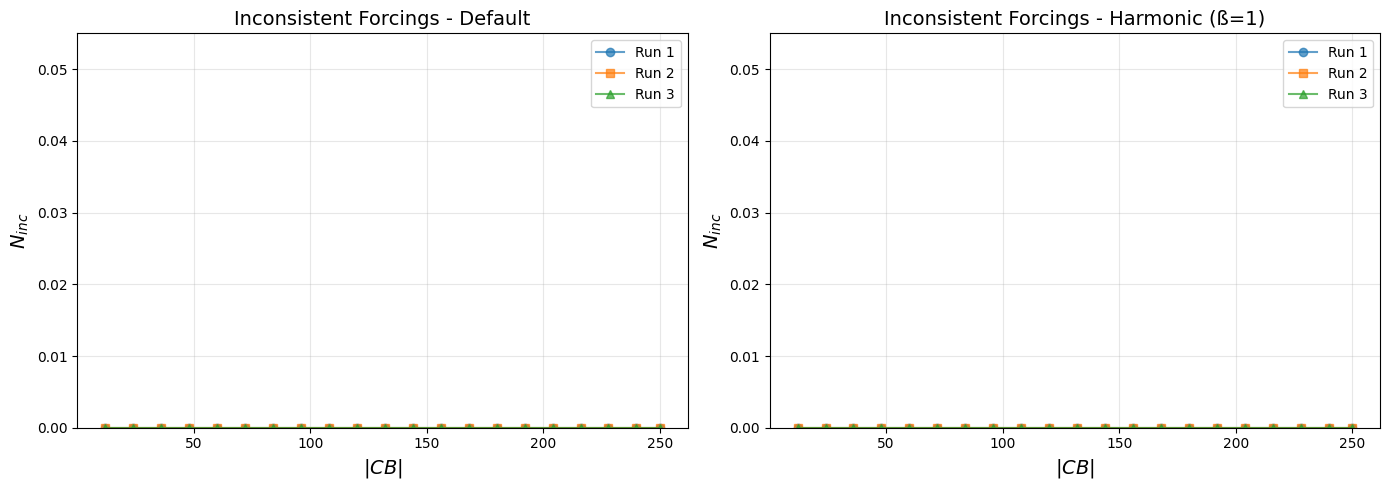

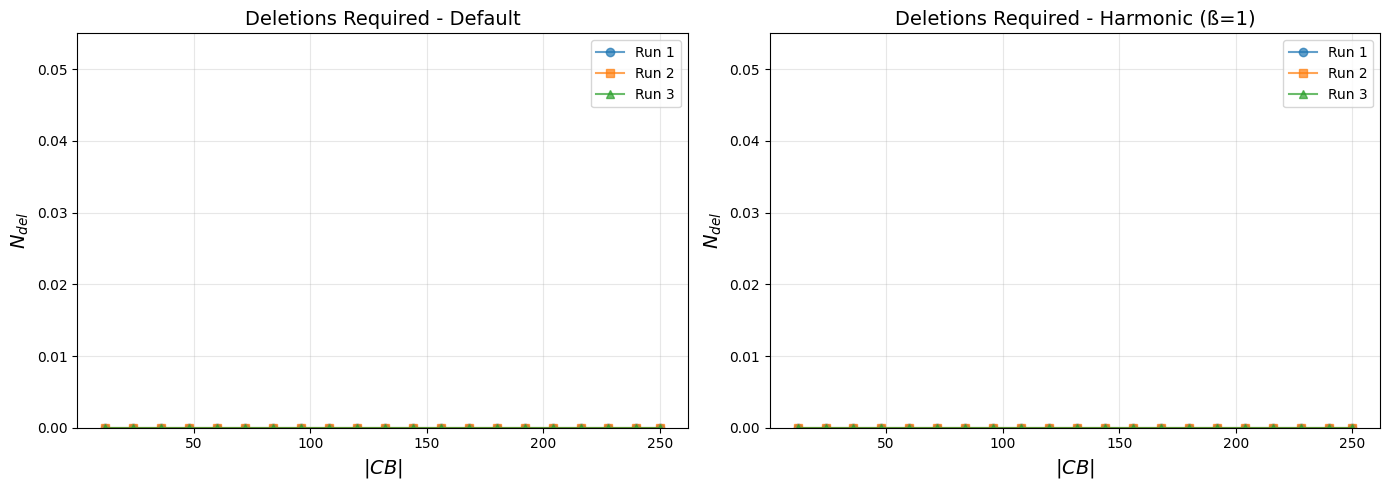

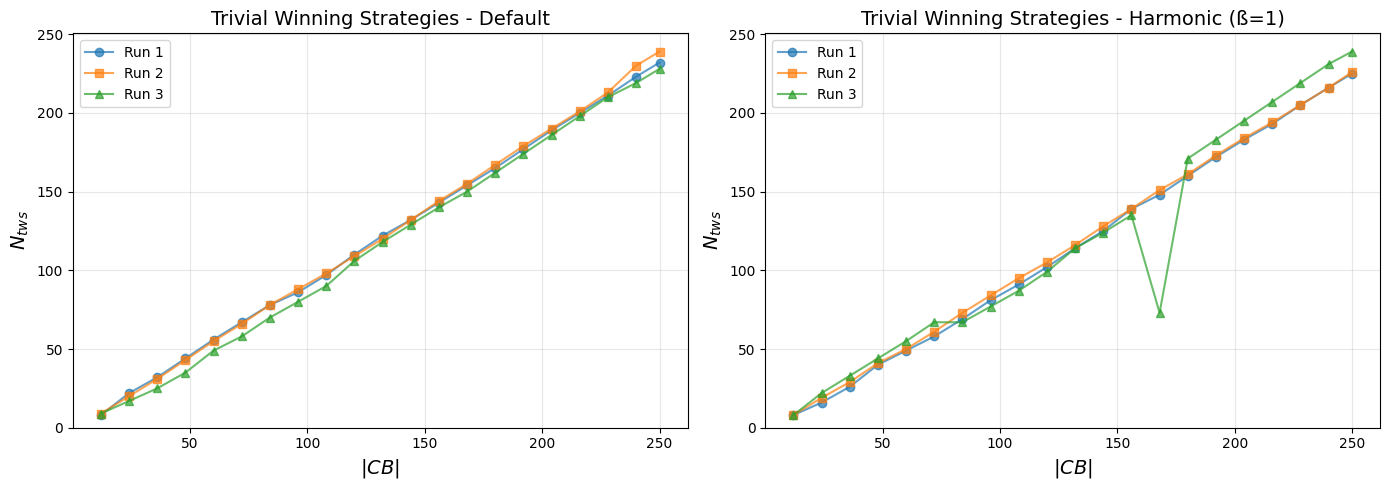

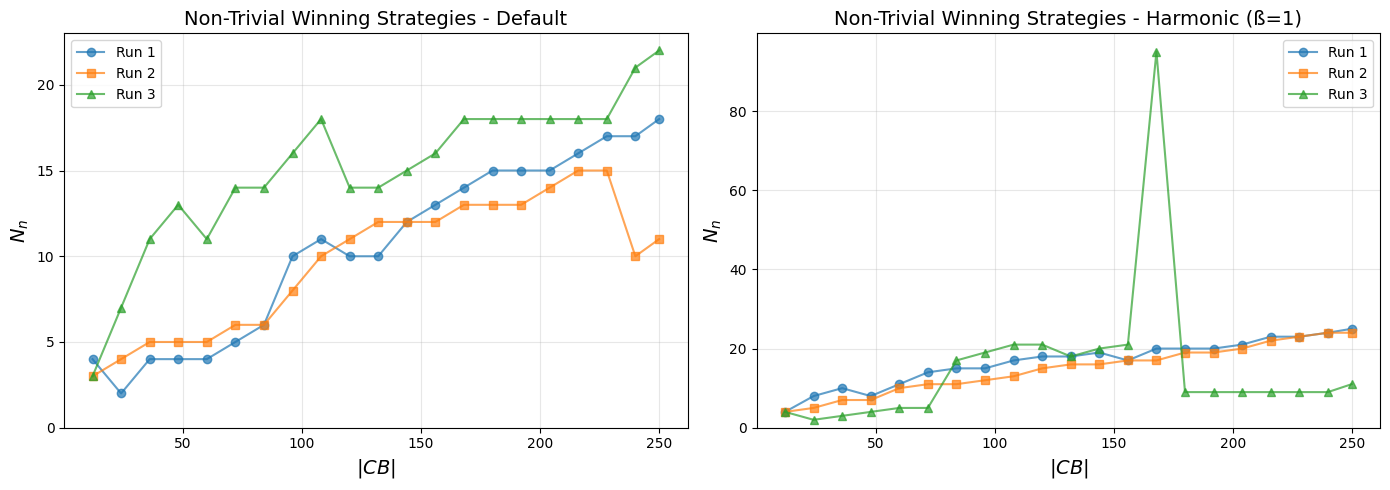

In [2]:
get_graphs("admission")

In [3]:
get_graphs("churn")

FileNotFoundError: [Errno 2] No such file or directory: 'results/Q_churn_default_0.csv'

In [ ]:
get_graphs("gtd")